In [1]:
import pandas as pd

# 读取原始 Excel 文件
df = pd.read_excel('h2s_v=20.xlsm')

In [2]:
print(df)

      wavenumber        t=100k        t=200k        t=300k        t=400k  \
0              0  4.606115e-22  1.018179e-22  3.994898e-23  2.027856e-23   
1             20  1.484106e-20  6.015711e-21  3.551624e-21  2.385914e-21   
2             40  5.821327e-20  2.087037e-20  1.129595e-20  7.540872e-21   
3             60  1.002754e-19  5.303739e-20  2.999087e-20  1.918031e-20   
4             80  6.082678e-20  6.442946e-20  4.711100e-20  3.379336e-20   
...          ...           ...           ...           ...           ...   
996        19920  9.781633e-29  2.033051e-28  2.858347e-28  3.225536e-28   
997        19940  1.956758e-28  5.111700e-28  6.428535e-28  6.433377e-28   
998        19960  2.535720e-28  3.048525e-28  3.737171e-28  3.844764e-28   
999        19980  5.097892e-28  1.191858e-27  1.361142e-27  1.291661e-27   
1000       20000  2.538468e-28  1.131525e-27  1.476467e-27  1.476762e-27   

            t=500k        t=600k        t=700k        t=800k        t=900k  \
0     1.1

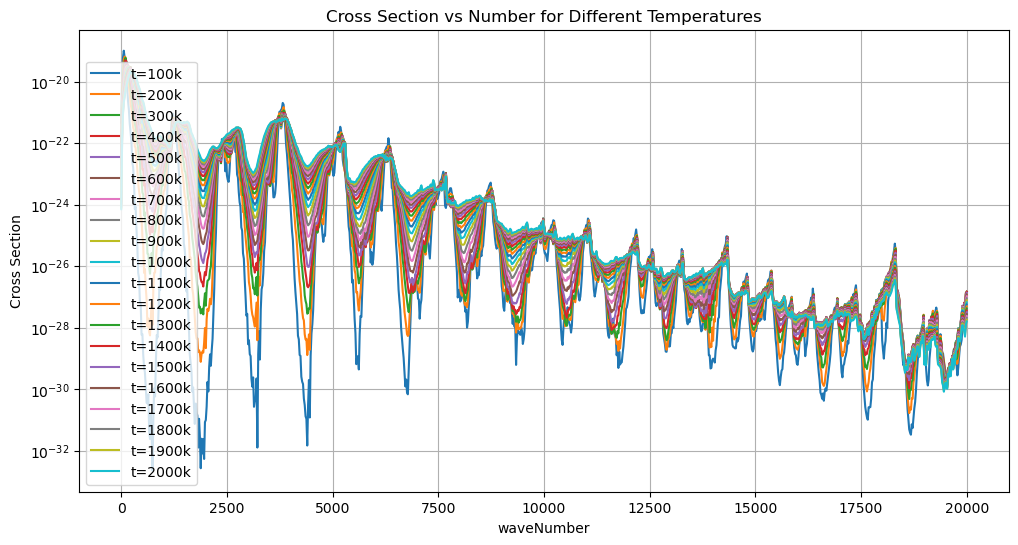

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

for col in df.columns:
    if col != 'wavenumber':
        plt.plot(df['wavenumber'], df[col], label=col)

plt.xlabel('waveNumber')
plt.ylabel('Cross Section')
plt.title('Cross Section vs Number for Different Temperatures')
plt.yscale('log')  # 设置 Y 轴为对数坐标
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import pandas as pd
import numpy as np

# 假设 df 是你的 DataFrame，包含 'number' 列和多个 t=xxxk 列
columns_to_exclude = ['t=1800k', 't=1900k', 't=2000k']
columns_to_normalize = [col for col in df.columns if col.startswith('t=') and col not in columns_to_exclude]

# Step 1: 提取需要标准化的部分
data_to_normalize = df[columns_to_normalize].copy()

# Step 2: 按行计算均值和标准差
row_means = data_to_normalize.mean(axis=1)
row_stds = data_to_normalize.std(axis=1)

# Step 3: 按行标准化（广播操作）
df_scaled = (data_to_normalize.subtract(row_means, axis=0)).divide(row_stds, axis=0)

# Step 4: 保存每行均值和标准差（可选）
df_stats = pd.DataFrame({
    'wavenumber': df['wavenumber'],
    'row_mean': row_means,
    'row_std': row_stds
})

# Step 5: 重新拼接
df_final = pd.concat([df[['wavenumber']], df_scaled, df[columns_to_exclude]], axis=1)

# 可选：按顺序排列列名
final_columns = ['wavenumber'] + columns_to_normalize + columns_to_exclude
df_final = df_final[final_columns]

# 显示结果
print("Mean and standard deviation for each row：")
print(df_stats.head())

print("\nFirst few rows of standardized data：")
print(df_final.head())

Mean and standard deviation for each row：
   wavenumber      row_mean       row_std
0           0  3.924026e-23  1.114224e-22
1          20  2.043911e-21  3.633506e-21
2          40  7.705262e-21  1.393409e-20
3          60  1.619235e-20  2.526493e-20
4          80  1.972213e-20  1.996036e-20

First few rows of standardized data：
   wavenumber    t=100k    t=200k    t=300k    t=400k    t=500k    t=600k  \
0           0  3.781746  0.561625  0.006361 -0.170178 -0.244980 -0.282461   
1          20  3.521983  1.093104  0.414947  0.094125 -0.090902 -0.208917   
2          40  3.624781  0.944813  0.257691 -0.011798 -0.148137 -0.229941   
3          60  3.328054  1.458347  0.546153  0.118265 -0.107326 -0.238614   
4          80  2.059314  2.239806  1.372163  0.704959  0.263637 -0.029247   

     t=700k    t=800k    t=900k  ...   t=1100k   t=1200k   t=1300k   t=1400k  \
0 -0.303427 -0.316124 -0.324302  ... -0.333763 -0.336640 -0.338818 -0.340513   
1 -0.288990 -0.345709 -0.387220  ... -0.44235

In [6]:
test_df = df[columns_to_exclude].copy()
print(test_df)
test_df = (test_df.subtract(row_means, axis=0)).divide(row_stds, axis=0)
print(test_df)
test_df = pd.concat([df[['wavenumber']], test_df], axis=1)
print(test_df)
train_df = pd.concat([df[['wavenumber']], df_scaled], axis=1)
print(train_df)

           t=1800k       t=1900k       t=2000k
0     8.412044e-25  7.688705e-25  7.064194e-25
1     1.600841e-22  1.424269e-22  1.273007e-22
2     1.016706e-21  9.277926e-22  8.485056e-22
3     2.425634e-21  2.261029e-21  2.110521e-21
4     3.731744e-21  3.464354e-21  3.226567e-21
...            ...           ...           ...
996   1.102616e-28  9.894981e-29  8.888782e-29
997   9.972210e-29  8.768393e-29  7.730843e-29
998   6.566526e-29  5.779275e-29  5.099544e-29
999   1.653557e-28  1.445697e-28  1.267769e-28
1000  2.059323e-28  1.801684e-28  1.580837e-28

[1001 rows x 3 columns]
       t=1800k   t=1900k   t=2000k
0    -0.344626 -0.345275 -0.345836
1    -0.518460 -0.523319 -0.527482
2    -0.480014 -0.486395 -0.492085
3    -0.544894 -0.551409 -0.557367
4    -0.801107 -0.814503 -0.826416
...        ...       ...       ...
996  -1.553631 -1.698127 -1.826657
997  -1.326092 -1.390794 -1.446559
998  -1.485240 -1.559321 -1.623285
999  -1.267773 -1.319893 -1.364507
1000 -1.242348 -1.300268 -

Test Mean Squared Error (MSE): 1.5017e+00
Test Root Mean Squared Error (RMSE): 1.2254e+00
Test Mean Absolute Error (MAE): 9.8848e-01
Test R-squared (R2): 0.4216
Test Mean Absolute Percentage Error (MAPE): 327.97%
Test Geometric Mean Error (GME): 6.6215e-01


/opt/anaconda3/envs/rdkit_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.964e+03, tolerance: 1.602e+00
  model = cd_fast.enet_coordinate_descent(


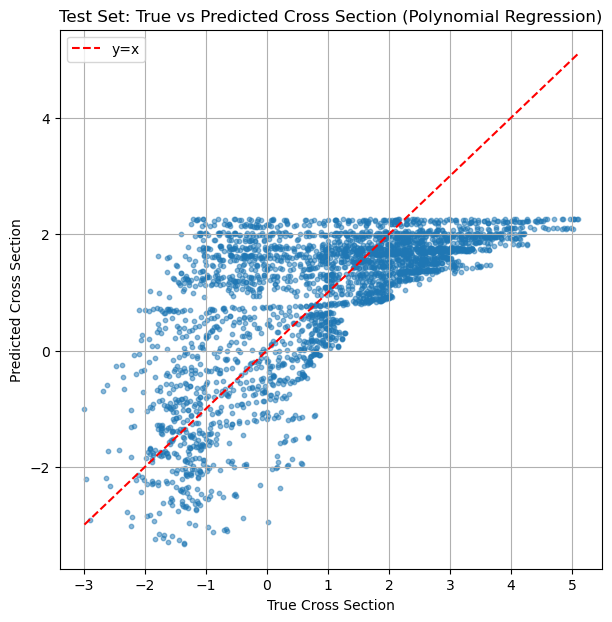

In [7]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# 重命名列名
train_df = train_df.rename(columns={'number': 'wavenumber'})

# 将宽格式转换成长格式
long_df = pd.melt(
    train_df,
    id_vars='wavenumber',
    value_vars=[col for col in train_df.columns if col.startswith('t=')],
    var_name='temperature',
    value_name='cross_section'
)

# 清理 temperature 列，转成整数
long_df['temperature'] = long_df['temperature'].str.replace('t=', '', regex=False).str.replace('k', '', regex=False).str.replace('K', '', regex=False)
long_df['temperature'] = long_df['temperature'].astype(int)

# 准备训练特征和标签
X_train = long_df[['wavenumber', 'temperature']]
y_train = long_df['cross_section']

# 处理测试集
test_df = test_df.rename(columns={'number': 'wavenumber'})

test_long_df = pd.melt(
    test_df,
    id_vars='wavenumber',
    value_vars=['t=1800k', 't=1900k', 't=2000k'],
    var_name='temperature',
    value_name='cross_section'
)

test_long_df['temperature'] = test_long_df['temperature'].str.replace('t=', '', regex=False).str.replace('k', '', regex=False).astype(int)

X_test = test_long_df[['wavenumber', 'temperature']]
y_test = test_long_df['cross_section']


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Lasso
degree = 6  
alpha = 1.0  
model = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    Lasso(alpha=alpha, max_iter=5000)
)

# 训练
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 预测测试集
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import gmean

# 计算各种评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 计算MAPE，避免除0，加入一个小常数1e-8
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100  # 百分比形式

# 计算预测误差的几何平均数，加入小常数避免log(0)
geometric_mean_error = gmean(np.abs(y_test - y_pred) + 1e-8)

# 打印评估指标
print(f"Test Mean Squared Error (MSE): {mse:.4e}")
print(f"Test Root Mean Squared Error (RMSE): {rmse:.4e}")
print(f"Test Mean Absolute Error (MAE): {mae:.4e}")
print(f"Test R-squared (R2): {r2:.4f}")
print(f"Test Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Test Geometric Mean Error (GME): {geometric_mean_error:.4e}")


# 绘制预测结果散点图
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='y=x')
plt.xlabel('True Cross Section')
plt.ylabel('Predicted Cross Section')
plt.title('Test Set: True vs Predicted Cross Section (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()


      wavenumber  temperature  cross_section  predicted
0              0         1800      -0.344626   1.175118
1             20         1800      -0.518460   1.180995
2             40         1800      -0.480014   1.186834
3             60         1800      -0.544894   1.192636
4             80         1800      -0.801107   1.198402
...          ...          ...            ...        ...
2998       19920         2000      -1.826657  -3.234016
2999       19940         2000      -1.446559  -3.256694
3000       19960         2000      -1.623285  -3.279455
3001       19980         2000      -1.364507  -3.302300
3002       20000         2000      -1.349917  -3.325229

[3003 rows x 4 columns]


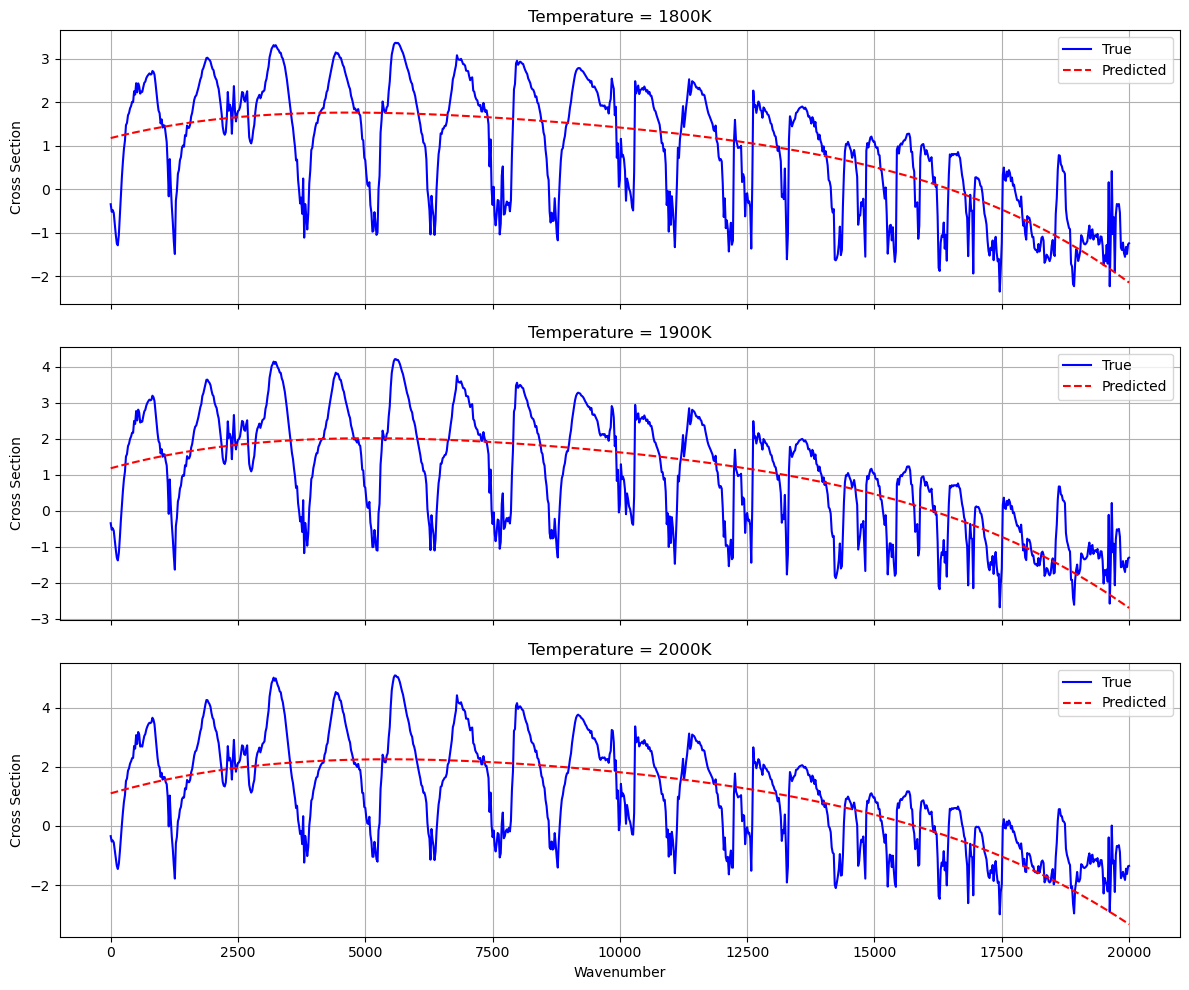

In [8]:
test_long_df['predicted'] = y_pred
print(test_long_df)
temperatures = [1800, 1900, 2000]

fig, axs = plt.subplots(len(temperatures), 1, figsize=(12, 10), sharex=True)

for i, temp in enumerate(temperatures):
    subset = test_long_df[test_long_df['temperature'] == temp]
    axs[i].plot(subset['wavenumber'], subset['cross_section'], label='True', color='blue')
    axs[i].plot(subset['wavenumber'], subset['predicted'], label='Predicted', color='red', linestyle='--')
    axs[i].set_title(f'Temperature = {temp}K')
    axs[i].set_ylabel('Cross Section')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Wavenumber')
plt.tight_layout()
plt.show()
# 准备空列表存放还原后的值
cross_section_restored = []
predicted_restored = []

# 把 df_stats 设置索引，方便查找
df_stats_indexed = df_stats.set_index('wavenumber')

for idx, row in test_long_df.iterrows():
    wnum = row['wavenumber']
    
    # 找对应的均值和标准差
    mean = df_stats_indexed.loc[wnum, 'row_mean']
    std = df_stats_indexed.loc[wnum, 'row_std']
    
    # 反归一化 = 标准化值 * std + mean
    cs_restored = row['cross_section'] * std + mean
    pred_restored = row['predicted'] * std + mean
    
    cross_section_restored.append(cs_restored)
    predicted_restored.append(pred_restored)

# 把还原后的值赋回 DataFrame
test_long_df['cross_section_restored'] = cross_section_restored
test_long_df['predicted_restored'] = predicted_restored

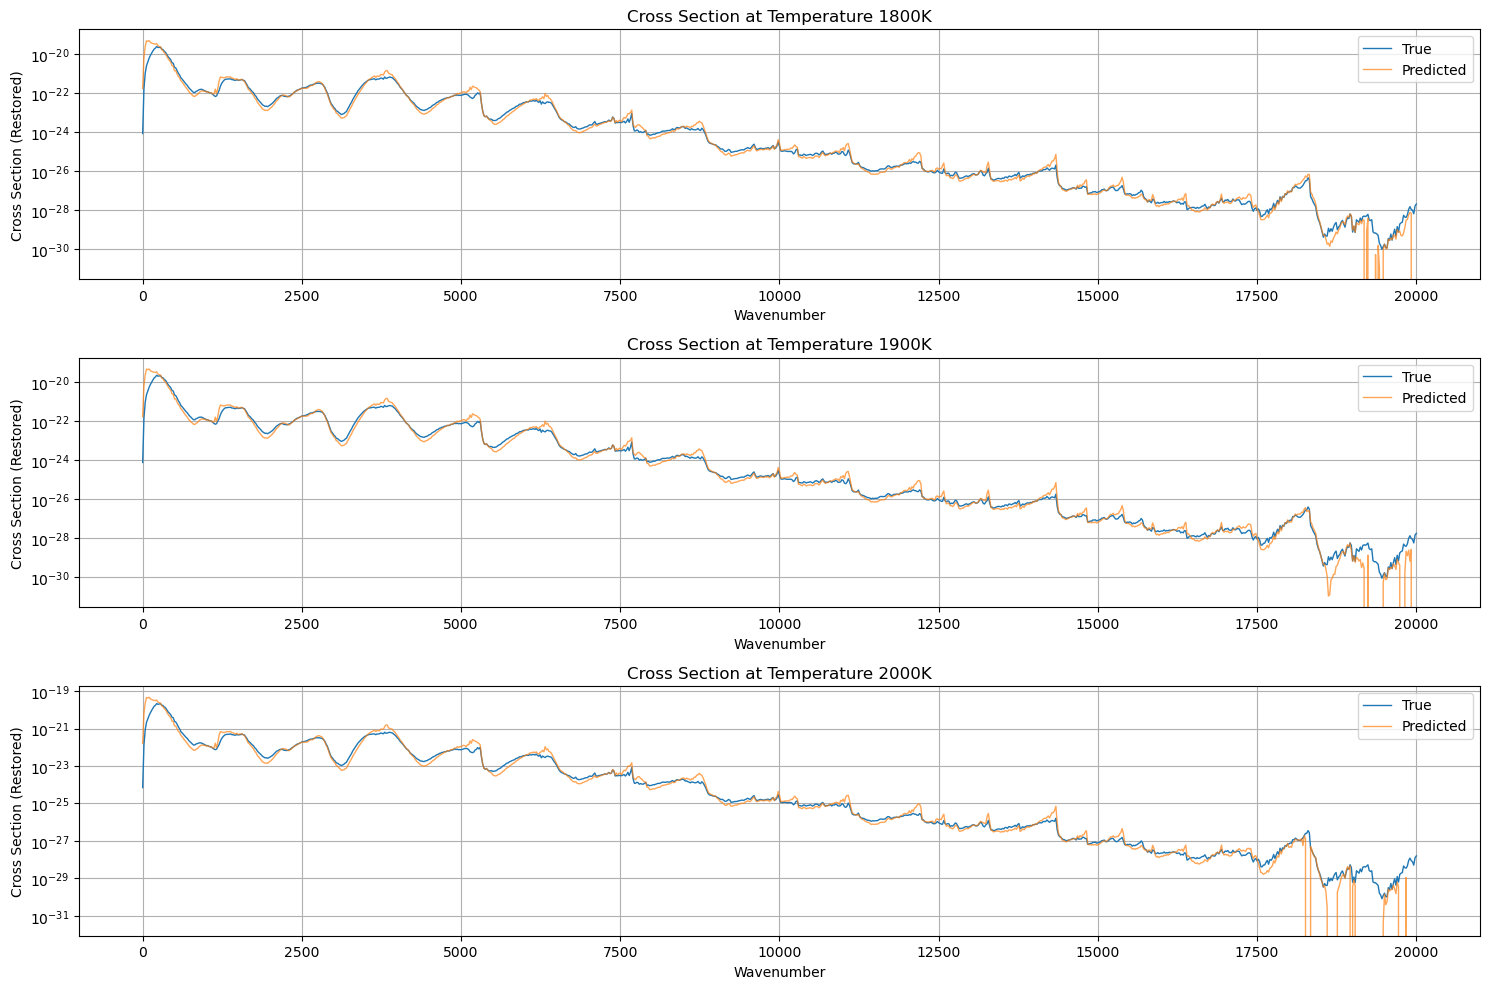

In [9]:
import matplotlib.pyplot as plt

temps = [1800, 1900, 2000]
plt.figure(figsize=(15, 10))

for i, temp in enumerate(temps, 1):
    plt.subplot(3, 1, i)
    subset = test_long_df[test_long_df['temperature'] == temp]
    plt.plot(subset['wavenumber'], subset['cross_section_restored'], label='True', linewidth=1)
    plt.plot(subset['wavenumber'], subset['predicted_restored'], label='Predicted', linewidth=1, alpha=0.7)
    plt.title(f'Cross Section at Temperature {temp}K')
    plt.xlabel('Wavenumber')
    plt.ylabel('Cross Section (Restored)')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')

plt.tight_layout()
plt.show()

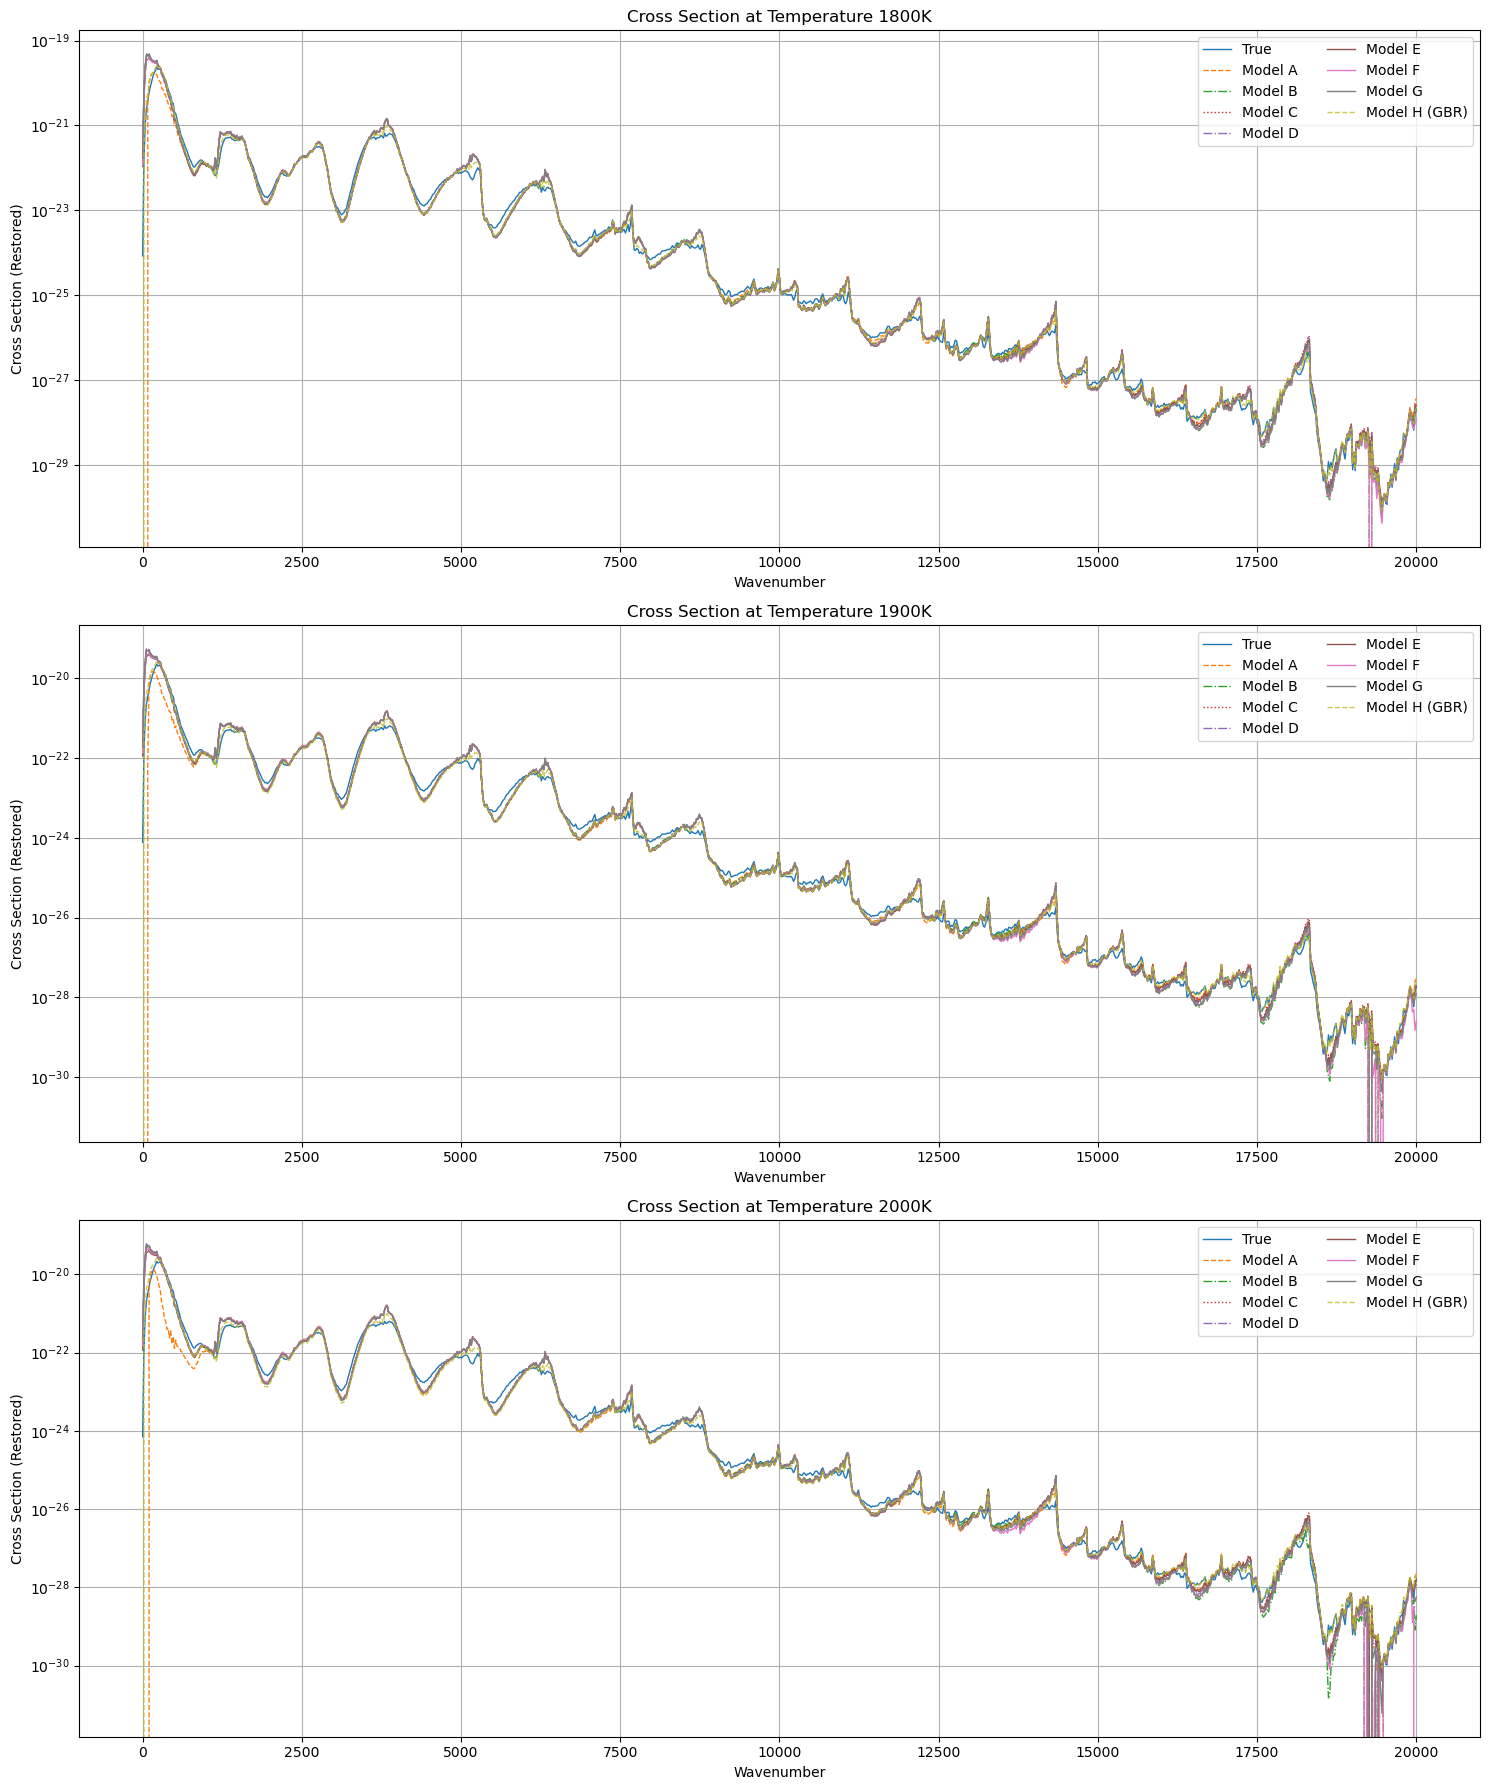

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# 统一的预处理管道函数
def make_poly_mlp(model, degree=2):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        model
    )

# 原模型（神经网络）
model_a = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 64, 32), max_iter=500, random_state=0))
model_b = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 64, 32), activation='relu', max_iter=5000, random_state=42))

# 新增的神经网络模型
model_c = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=500, random_state=1))
model_d = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=2))
model_e = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32, 16), max_iter=1000, random_state=3))
model_f = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(512, 256), max_iter=1000, random_state=4))
model_g = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 128), max_iter=1000, random_state=5))

# 非神经网络模型保持不变
model_h = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=6)

# 拟合各个模型
model_a.fit(X_train, y_train)
model_b.fit(X_train, y_train)
model_c.fit(X_train, y_train)
model_d.fit(X_train, y_train)
model_e.fit(X_train, y_train)
model_f.fit(X_train, y_train)
model_g.fit(X_train, y_train)
model_h.fit(X_train, y_train)

# 在测试集上预测
test_long_df['pred_a'] = model_a.predict(X_test)
test_long_df['pred_b'] = model_b.predict(X_test)
test_long_df['pred_c'] = model_c.predict(X_test)
test_long_df['pred_d'] = model_d.predict(X_test)
test_long_df['pred_e'] = model_e.predict(X_test)
test_long_df['pred_f'] = model_f.predict(X_test)
test_long_df['pred_g'] = model_g.predict(X_test)
test_long_df['pred_h'] = model_h.predict(X_test)

# 将标准化前的结果还原
cross_section_restored = []
pred_a_restored = []
pred_b_restored = []
pred_c_restored = []
pred_d_restored = []
pred_e_restored = []
pred_f_restored = []
pred_g_restored = []
pred_h_restored = []
df_stats_indexed = df_stats.set_index('wavenumber')

for idx, row in test_long_df.iterrows():
    wnum = row['wavenumber']
    mean = df_stats_indexed.loc[wnum, 'row_mean']
    std = df_stats_indexed.loc[wnum, 'row_std']
    
    cross_section_restored.append(row['cross_section'] * std + mean)
    pred_a_restored.append(row['pred_a'] * std + mean)
    pred_b_restored.append(row['pred_b'] * std + mean)
    pred_c_restored.append(row['pred_c'] * std + mean)
    pred_d_restored.append(row['pred_d'] * std + mean)
    pred_e_restored.append(row['pred_e'] * std + mean)
    pred_f_restored.append(row['pred_f'] * std + mean)
    pred_g_restored.append(row['pred_g'] * std + mean)
    pred_h_restored.append(row['pred_h'] * std + mean)    
    
test_long_df['cross_section_restored'] = cross_section_restored
test_long_df['pred_a_restored'] = pred_a_restored
test_long_df['pred_b_restored'] = pred_b_restored
test_long_df['pred_c_restored'] = pred_c_restored
test_long_df['pred_d_restored'] = pred_d_restored
test_long_df['pred_e_restored'] = pred_e_restored
test_long_df['pred_f_restored'] = pred_f_restored
test_long_df['pred_g_restored'] = pred_g_restored
test_long_df['pred_h_restored'] = pred_h_restored

# 绘制不同模型的预测结果和真实值的对比图
temps = [1800, 1900, 2000]
plt.figure(figsize=(15, 18))
for i, temp in enumerate(temps, 1):
    subset = test_long_df[test_long_df['temperature'] == temp]
    plt.subplot(3, 1, i)
    plt.plot(subset['wavenumber'], subset['cross_section_restored'], label='True', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_a_restored'], label='Model A', linestyle='--', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_b_restored'], label='Model B', linestyle='-.', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_c_restored'], label='Model C', linestyle=':', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_d_restored'], label='Model D', linestyle='dashdot', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_e_restored'], label='Model E', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_f_restored'], label='Model F', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_g_restored'], label='Model G', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_h_restored'], label='Model H (GBR)', linestyle='--', linewidth=1, alpha=0.8)
    
    plt.title(f'Cross Section at Temperature {temp}K')
    plt.xlabel('Wavenumber')
    plt.ylabel('Cross Section (Restored)')
    plt.yscale('log')
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)

plt.tight_layout()
plt.show()


每行的均值和标准差：
   wavenumber      row_mean       row_std
0           0  3.863802e-23  1.116308e-22
1          20  1.926924e-21  3.684282e-21
2          40  7.302180e-21  1.409895e-20
3          60  1.538918e-20  2.563865e-20
4          80  1.811681e-20  2.085294e-20

标准化后的数据前几行：
   wavenumber    t=100k    t=200k    t=300k    t=400k    t=500k    t=600k  \
0           0  3.780080  0.565972  0.011744 -0.164466 -0.239127 -0.276538   
1          20  3.505196  1.109792  0.440981  0.124581 -0.057896 -0.174285   
2          40  3.610985  0.962355  0.283267  0.016930 -0.117815 -0.198663   
3          60  3.310869  1.468416  0.569519  0.147868 -0.074435 -0.203810   
4          80  2.048151  2.220917  1.390413  0.751767  0.329335  0.048988   

    t=1000k   t=1100k   t=1200k  ...   t=1400k   t=1500k   t=1600k   t=1700k  \
0 -0.323833 -0.327745 -0.330616  ... -0.334482 -0.335829 -0.336923 -0.337827   
1 -0.380887 -0.404507 -0.422987  ... -0.449540 -0.459229 -0.467236 -0.473924   
2 -0.347969 -0.367983

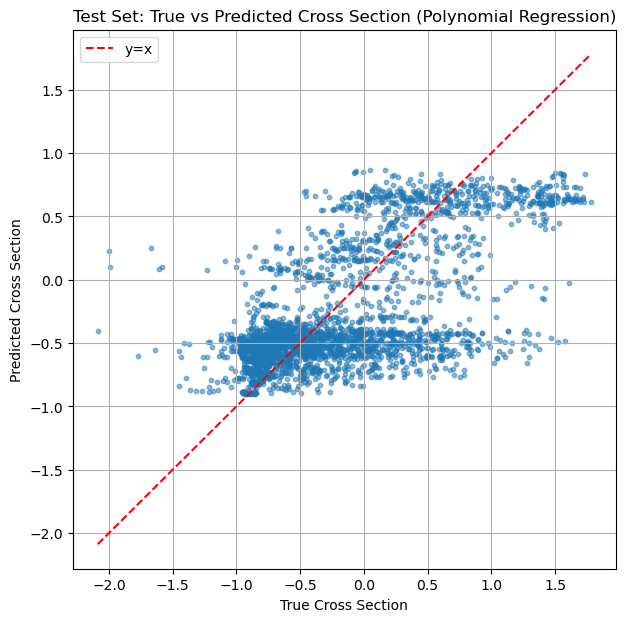

In [11]:
import pandas as pd
import numpy as np

# 假设 df 是你的 DataFrame，包含 'number' 列和多个 t=xxxk 列
columns_to_exclude = ['t=700k', 't=800k', 't=900k']
columns_to_normalize = [col for col in df.columns if col.startswith('t=') and col not in columns_to_exclude]

# Step 1: 提取需要标准化的部分
data_to_normalize = df[columns_to_normalize].copy()

# Step 2: 按行计算均值和标准差
row_means = data_to_normalize.mean(axis=1)
row_stds = data_to_normalize.std(axis=1)

# Step 3: 按行标准化（广播操作）
df_scaled = (data_to_normalize.subtract(row_means, axis=0)).divide(row_stds, axis=0)

# Step 4: 保存每行均值和标准差（可选）
df_stats = pd.DataFrame({
    'wavenumber': df['wavenumber'],
    'row_mean': row_means,
    'row_std': row_stds
})

# Step 5: 重新拼接
df_final = pd.concat([df[['wavenumber']], df_scaled, df[columns_to_exclude]], axis=1)

# 可选：按顺序排列列名
final_columns = ['wavenumber'] + columns_to_normalize + columns_to_exclude
df_final = df_final[final_columns]

# 显示结果
print("每行的均值和标准差：")
print(df_stats.head())

print("\n标准化后的数据前几行：")
print(df_final.head())
test_df = df[columns_to_exclude].copy()
test_df = (test_df.subtract(row_means, axis=0)).divide(row_stds, axis=0)
test_df = pd.concat([df[['wavenumber']], test_df], axis=1)
train_df = pd.concat([df[['wavenumber']], df_scaled], axis=1)
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# 重命名列名
train_df = train_df.rename(columns={'number': 'wavenumber'})

# 将宽格式转换成长格式
long_df = pd.melt(
    train_df,
    id_vars='wavenumber',
    value_vars=[col for col in train_df.columns if col.startswith('t=')],
    var_name='temperature',
    value_name='cross_section'
)

# 清理 temperature 列，转成整数
long_df['temperature'] = long_df['temperature'].str.replace('t=', '', regex=False).str.replace('k', '', regex=False).str.replace('K', '', regex=False)
long_df['temperature'] = long_df['temperature'].astype(int)

# 准备训练特征和标签
X_train = long_df[['wavenumber', 'temperature']]
y_train = long_df['cross_section']
print(long_df)
# 处理测试集
test_df = test_df.rename(columns={'number': 'wavenumber'})

test_long_df = pd.melt(
    test_df,
    id_vars='wavenumber',
    value_vars=['t=700k', 't=800k', 't=900k'],
    var_name='temperature',
    value_name='cross_section'
)

test_long_df['temperature'] = test_long_df['temperature'].str.replace('t=', '', regex=False).str.replace('k', '', regex=False).astype(int)
print(test_long_df)
X_test = test_long_df[['wavenumber', 'temperature']]
y_test = test_long_df['cross_section']
print(X_test)
print(y_test)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPRegressor

model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),  # 多项式特征
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(128, 64, 64, 32), activation='relu', max_iter=5000, random_state=42)
)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import gmean

# 计算各种评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 计算MAPE，避免除0，加入一个小常数1e-8
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100  # 百分比形式

# 计算预测误差的几何平均数，加入小常数避免log(0)
geometric_mean_error = gmean(np.abs(y_test - y_pred) + 1e-8)

# 打印评估指标
print(f"Test Mean Squared Error (MSE): {mse:.4e}")
print(f"Test Root Mean Squared Error (RMSE): {rmse:.4e}")
print(f"Test Mean Absolute Error (MAE): {mae:.4e}")
print(f"Test R-squared (R2): {r2:.4f}")
print(f"Test Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Test Geometric Mean Error (GME): {geometric_mean_error:.4e}")



# 绘制预测结果散点图
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='y=x')
plt.xlabel('True Cross Section')
plt.ylabel('Predicted Cross Section')
plt.title('Test Set: True vs Predicted Cross Section (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

      wavenumber  temperature  cross_section  predicted
0              0          700      -0.297466  -0.130247
1             20          700      -0.253254  -0.080030
2             40          700      -0.253171  -0.029143
3             60          700      -0.285190  -0.004201
4             80          700      -0.142730  -0.003645
...          ...          ...            ...        ...
2998       19920          900       0.959021   0.687019
2999       19940          900       0.291406   0.690717
3000       19960          900       0.305533   0.694519
3001       19980          900       0.139860   0.698326
3002       20000          900       0.279552   0.702139

[3003 rows x 4 columns]


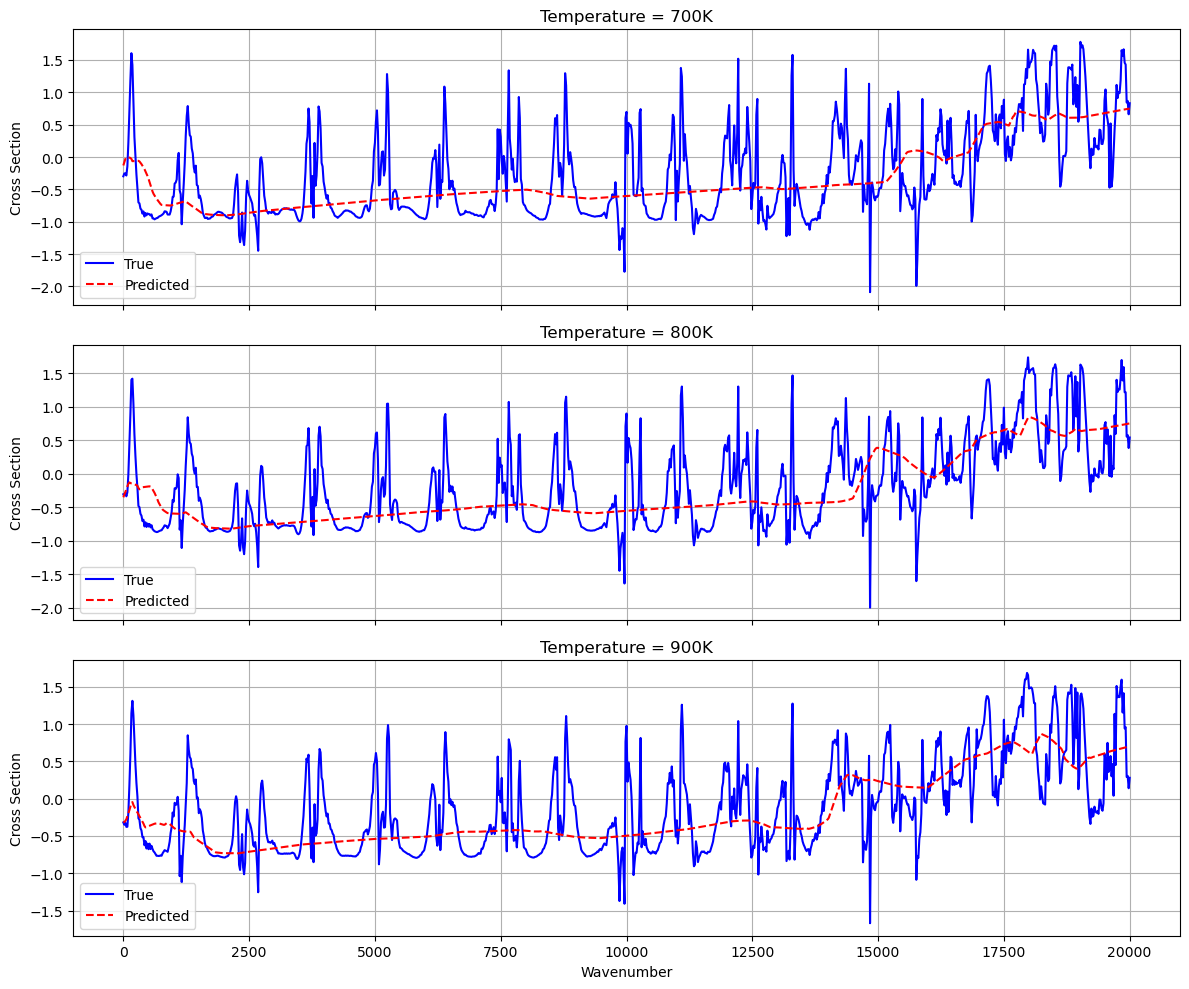

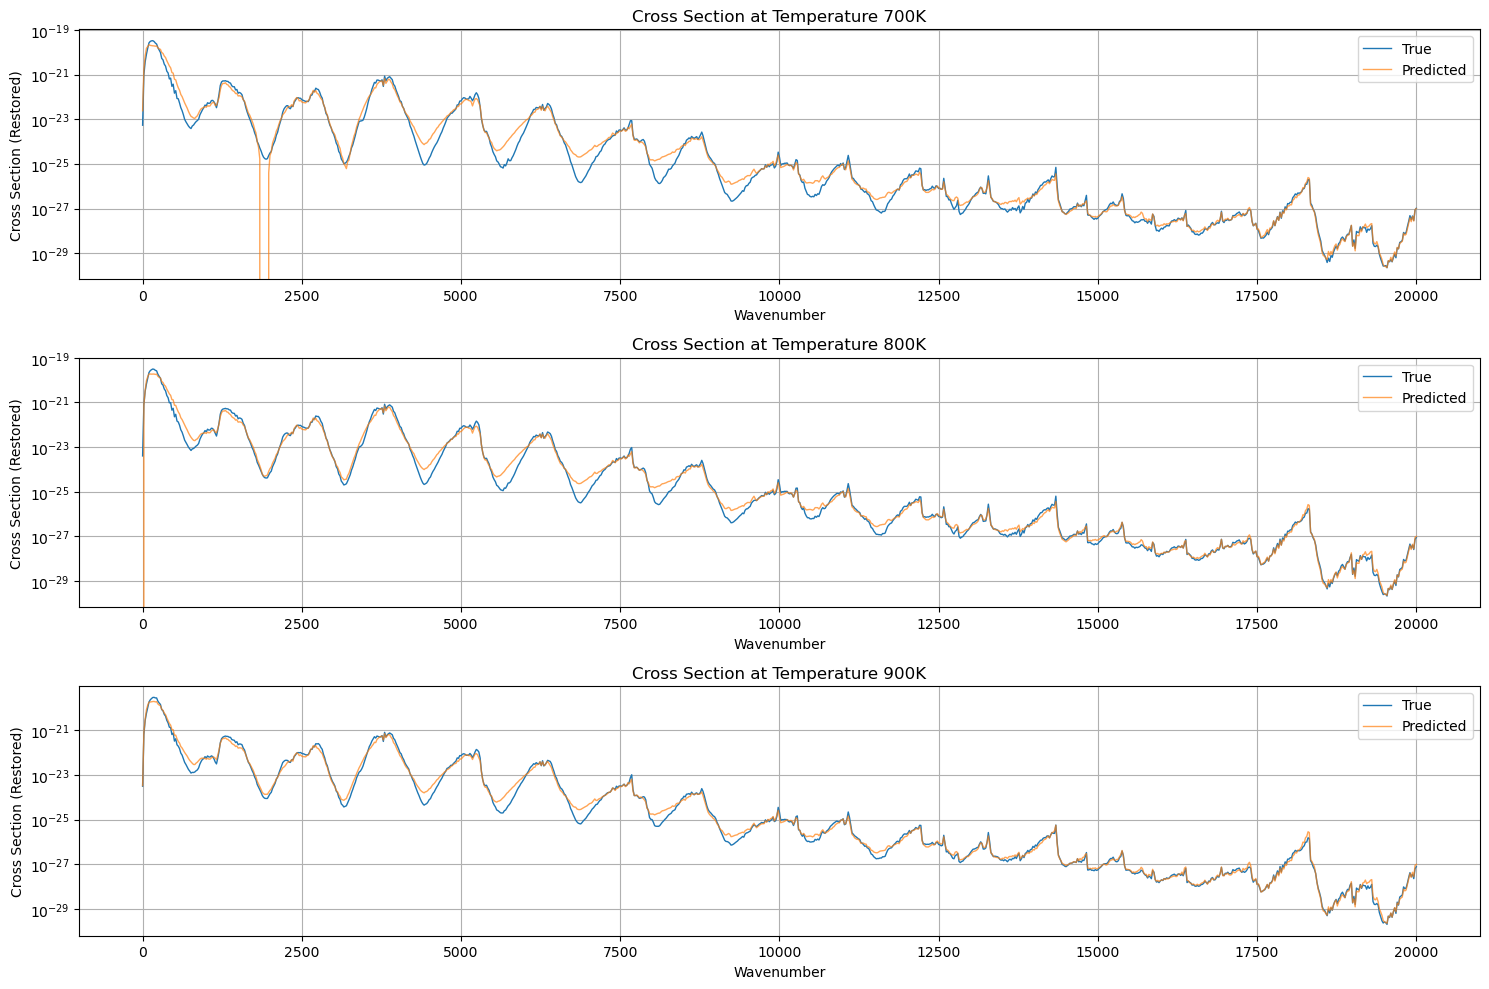

In [12]:
test_long_df['predicted'] = y_pred
print(test_long_df)
temperatures = [700, 800, 900]

fig, axs = plt.subplots(len(temperatures), 1, figsize=(12, 10), sharex=True)

for i, temp in enumerate(temperatures):
    subset = test_long_df[test_long_df['temperature'] == temp]
    axs[i].plot(subset['wavenumber'], subset['cross_section'], label='True', color='blue')
    axs[i].plot(subset['wavenumber'], subset['predicted'], label='Predicted', color='red', linestyle='--')
    axs[i].set_title(f'Temperature = {temp}K')
    axs[i].set_ylabel('Cross Section')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Wavenumber')
plt.tight_layout()
plt.show()

cross_section_restored = []
predicted_restored = []

# 把 df_stats 设置索引，方便查找
df_stats_indexed = df_stats.set_index('wavenumber')

for idx, row in test_long_df.iterrows():
    wnum = row['wavenumber']
    
    # 找对应的均值和标准差
    mean = df_stats_indexed.loc[wnum, 'row_mean']
    std = df_stats_indexed.loc[wnum, 'row_std']
    
    # 反归一化 = 标准化值 * std + mean
    cs_restored = row['cross_section'] * std + mean
    pred_restored = row['predicted'] * std + mean
    
    cross_section_restored.append(cs_restored)
    predicted_restored.append(pred_restored)

# 把还原后的值赋回 DataFrame
test_long_df['cross_section_restored'] = cross_section_restored
test_long_df['predicted_restored'] = predicted_restored
import matplotlib.pyplot as plt

temps = [700, 800, 900]
plt.figure(figsize=(15, 10))

for i, temp in enumerate(temps, 1):
    plt.subplot(3, 1, i)
    subset = test_long_df[test_long_df['temperature'] == temp]
    plt.plot(subset['wavenumber'], subset['cross_section_restored'], label='True', linewidth=1)
    plt.plot(subset['wavenumber'], subset['predicted_restored'], label='Predicted', linewidth=1, alpha=0.7)
    plt.title(f'Cross Section at Temperature {temp}K')
    plt.xlabel('Wavenumber')
    plt.ylabel('Cross Section (Restored)')
    plt.legend()
    plt.yscale('log')
    plt.grid(True)

plt.tight_layout()
plt.show()

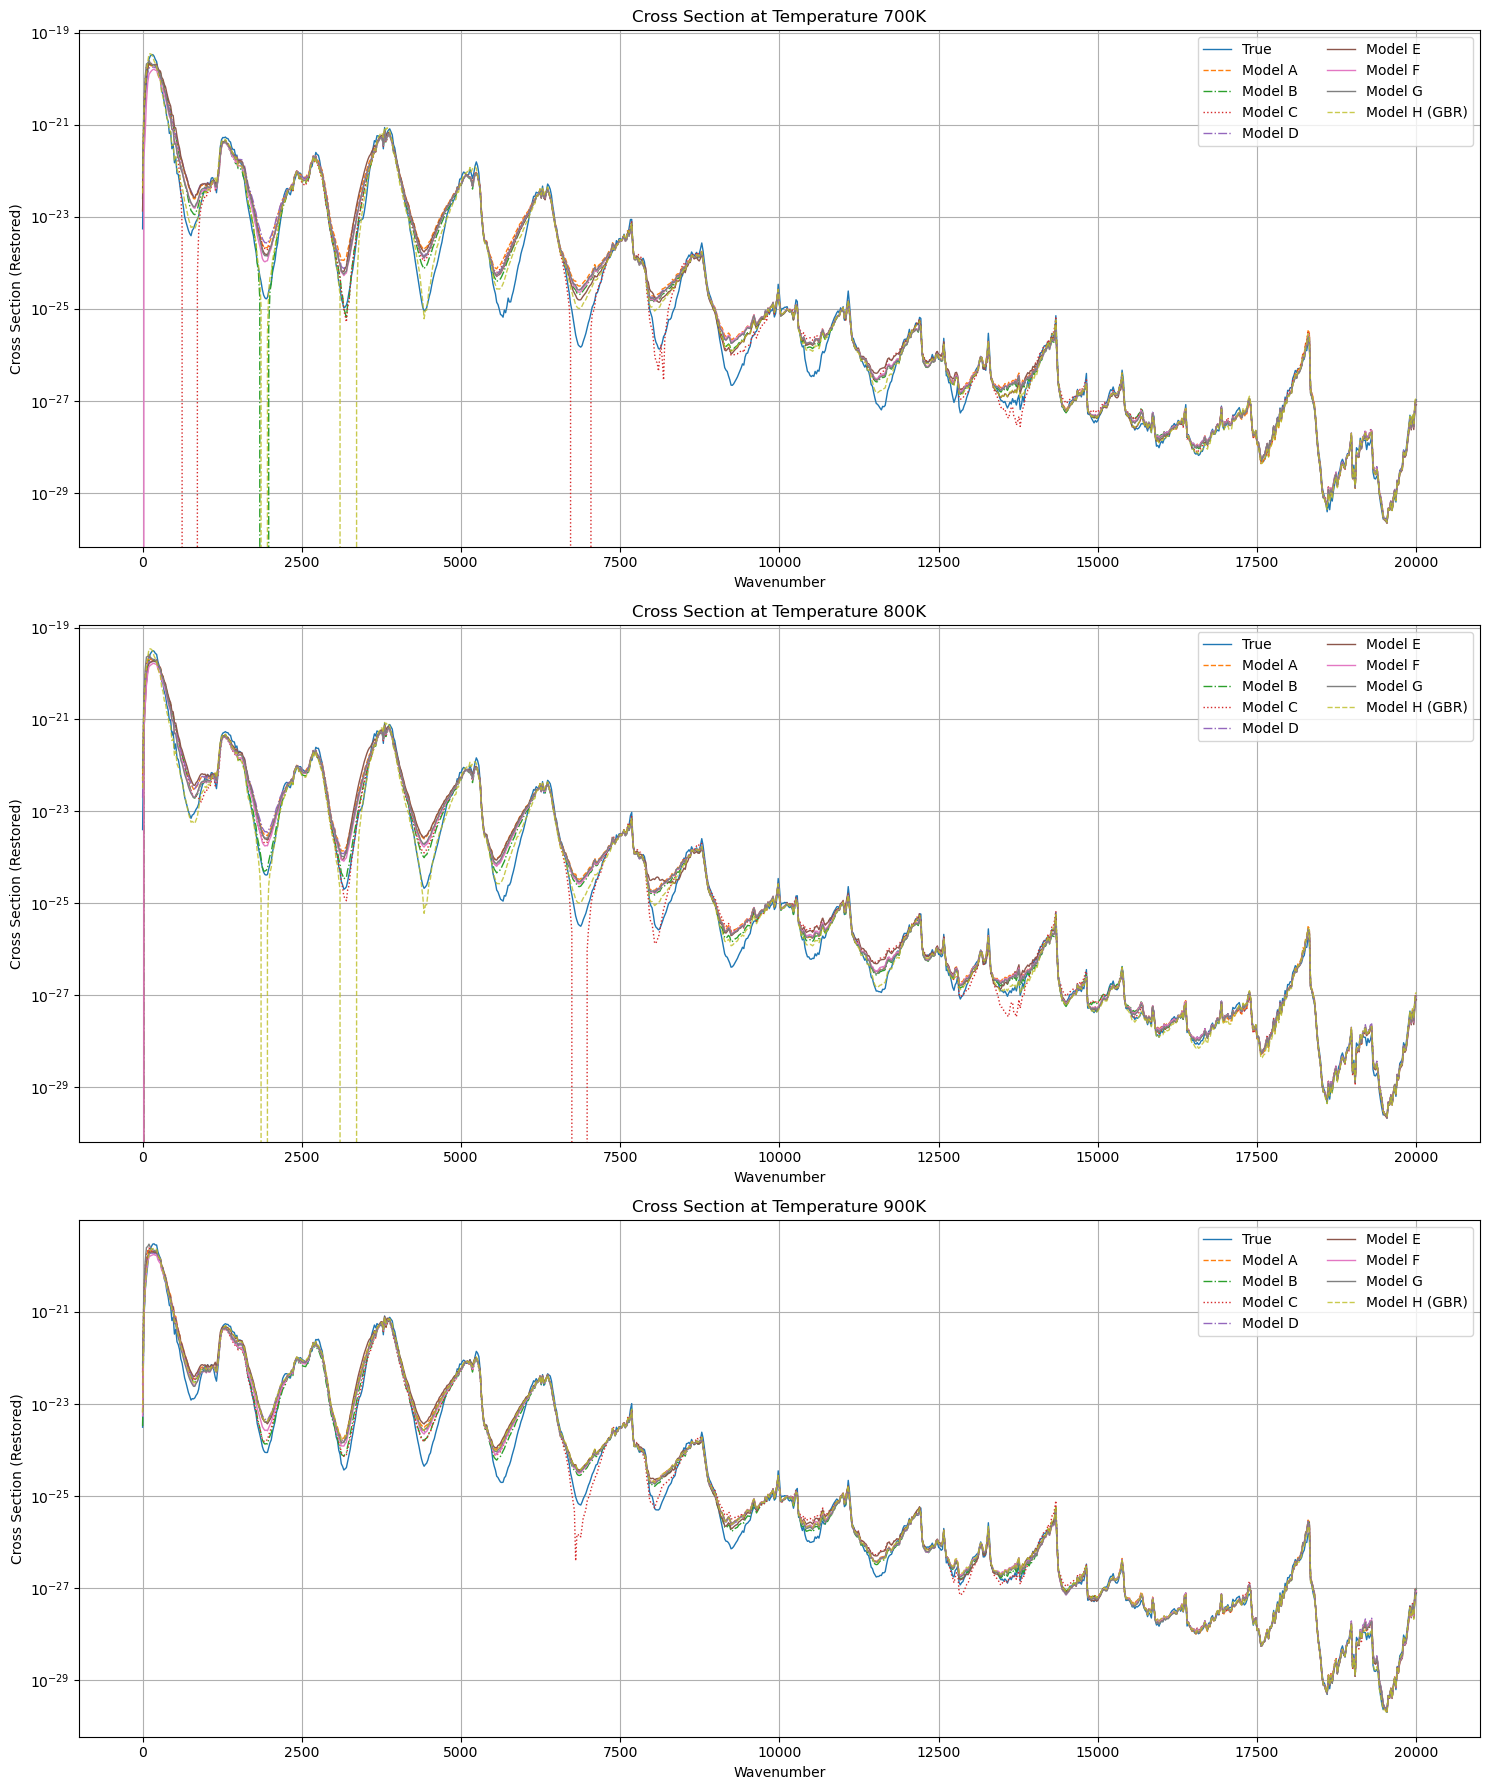

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# 统一的预处理管道函数
def make_poly_mlp(model, degree=2):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        model
    )

# 原模型（神经网络）
model_a = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 64, 32), max_iter=500, random_state=0))
model_b = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 64, 32), activation='relu', max_iter=5000, random_state=42))

# 新增的神经网络模型
model_c = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=500, random_state=1))
model_d = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=2))
model_e = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32, 16), max_iter=1000, random_state=3))
model_f = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(512, 256), max_iter=1000, random_state=4))
model_g = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 128), max_iter=1000, random_state=5))

# 非神经网络模型保持不变
model_h = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=6)

# 拟合各个模型
model_a.fit(X_train, y_train)
model_b.fit(X_train, y_train)
model_c.fit(X_train, y_train)
model_d.fit(X_train, y_train)
model_e.fit(X_train, y_train)
model_f.fit(X_train, y_train)
model_g.fit(X_train, y_train)
model_h.fit(X_train, y_train)

# 在测试集上预测
test_long_df['pred_a'] = model_a.predict(X_test)
test_long_df['pred_b'] = model_b.predict(X_test)
test_long_df['pred_c'] = model_c.predict(X_test)
test_long_df['pred_d'] = model_d.predict(X_test)
test_long_df['pred_e'] = model_e.predict(X_test)
test_long_df['pred_f'] = model_f.predict(X_test)
test_long_df['pred_g'] = model_g.predict(X_test)
test_long_df['pred_h'] = model_h.predict(X_test)

# 将标准化前的结果还原
cross_section_restored = []
pred_a_restored = []
pred_b_restored = []
pred_c_restored = []
pred_d_restored = []
pred_e_restored = []
pred_f_restored = []
pred_g_restored = []
pred_h_restored = []
df_stats_indexed = df_stats.set_index('wavenumber')

for idx, row in test_long_df.iterrows():
    wnum = row['wavenumber']
    mean = df_stats_indexed.loc[wnum, 'row_mean']
    std = df_stats_indexed.loc[wnum, 'row_std']
    
    cross_section_restored.append(row['cross_section'] * std + mean)
    pred_a_restored.append(row['pred_a'] * std + mean)
    pred_b_restored.append(row['pred_b'] * std + mean)
    pred_c_restored.append(row['pred_c'] * std + mean)
    pred_d_restored.append(row['pred_d'] * std + mean)
    pred_e_restored.append(row['pred_e'] * std + mean)
    pred_f_restored.append(row['pred_f'] * std + mean)
    pred_g_restored.append(row['pred_g'] * std + mean)
    pred_h_restored.append(row['pred_h'] * std + mean)    
    
test_long_df['cross_section_restored'] = cross_section_restored
test_long_df['pred_a_restored'] = pred_a_restored
test_long_df['pred_b_restored'] = pred_b_restored
test_long_df['pred_c_restored'] = pred_c_restored
test_long_df['pred_d_restored'] = pred_d_restored
test_long_df['pred_e_restored'] = pred_e_restored
test_long_df['pred_f_restored'] = pred_f_restored
test_long_df['pred_g_restored'] = pred_g_restored
test_long_df['pred_h_restored'] = pred_h_restored

# 绘制不同模型的预测结果和真实值的对比图
temps = [700, 800, 900]
plt.figure(figsize=(15, 18))
for i, temp in enumerate(temps, 1):
    subset = test_long_df[test_long_df['temperature'] == temp]
    plt.subplot(3, 1, i)
    plt.plot(subset['wavenumber'], subset['cross_section_restored'], label='True', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_a_restored'], label='Model A', linestyle='--', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_b_restored'], label='Model B', linestyle='-.', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_c_restored'], label='Model C', linestyle=':', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_d_restored'], label='Model D', linestyle='dashdot', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_e_restored'], label='Model E', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_f_restored'], label='Model F', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_g_restored'], label='Model G', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_h_restored'], label='Model H (GBR)', linestyle='--', linewidth=1, alpha=0.8)
    
    plt.title(f'Cross Section at Temperature {temp}K')
    plt.xlabel('Wavenumber')
    plt.ylabel('Cross Section (Restored)')
    plt.yscale('log')
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)

plt.tight_layout()
plt.show()
